# I will use KNN to know the patient has Heart Disease or NO

import lib

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

import Data 

In [26]:
df = pd.read_csv('Heart Disease Dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


About this file
age = age in years
sex = (1 = male; 0 = female)
cp= chest pain type
trestbps= resting blood pressure (in mm Hg on admission to the hospital)
chol = serum cholestoral in mg/dl
fbs = ( fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg = resting electrocardiographic results
thalach = maximum heart rate achieved
exang = exercise induced angina (1 = yes; 0 = no)
oldpeak = ST depression induced by exercise relative to rest
slope = the slope of the peak exercise ST segment
ca = number of major vessels (0-3) colored by flourosopy
thal3 = normal; 6 = fixed defect; 7 = reversable defect
target = 1 or 0

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [30]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


 Data analysis and visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025B2ABFA7C8>,
      dtype=object)

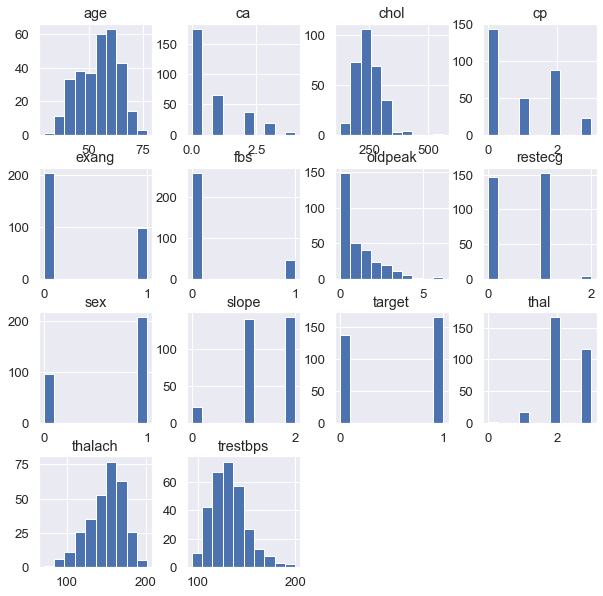

In [36]:
df.hist()

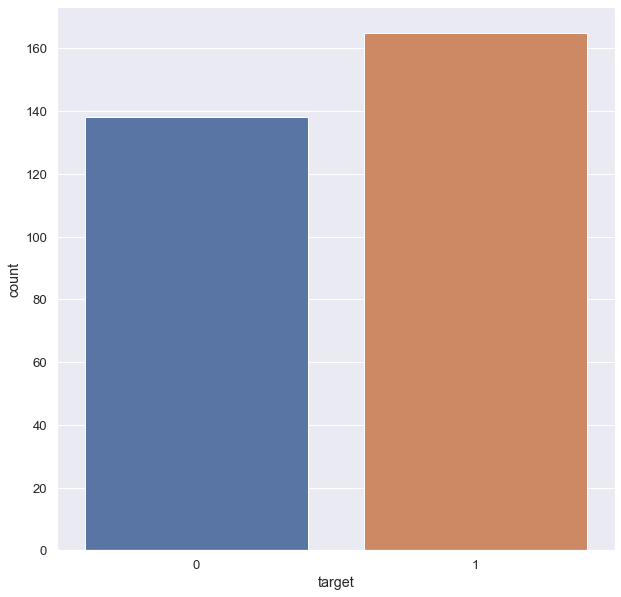

In [37]:
sns.countplot(x='target',data=df)

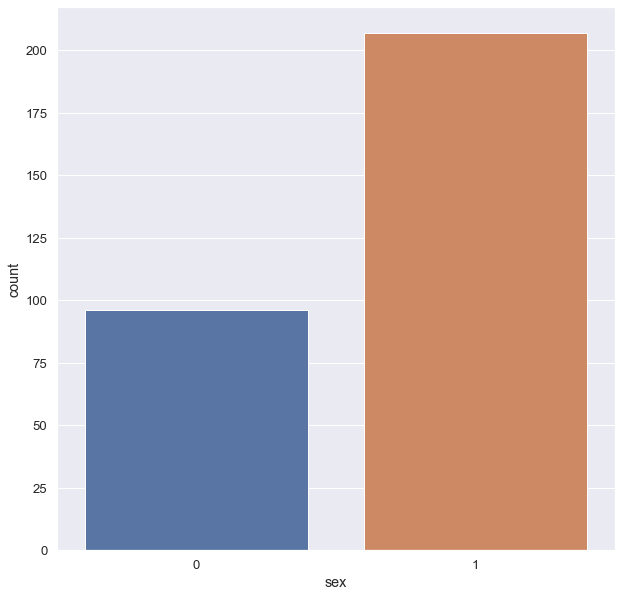

In [39]:
sns.countplot(x='sex',data=df)
#male=1,Female=0

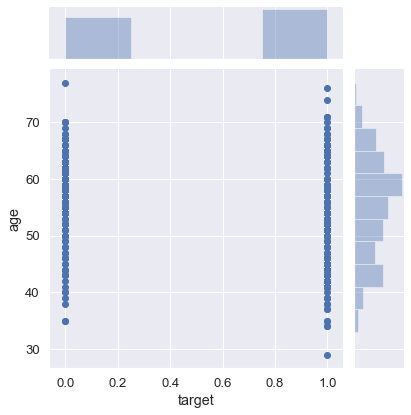

In [45]:
sns.jointplot(data=df, x='target', y='age',kind='scatter')

Data Preprocessing

In [49]:
x=df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
y=df['target']

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [52]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Train Model

In [53]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [54]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Evaluate Model

In [55]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0], dtype=int64)

In [56]:
y_test

290    0
67     1
34     1
217    0
254    0
      ..
33     1
253    0
272    0
139    1
235    0
Name: target, Length: 91, dtype: int64

In [57]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [58]:
confusion_matrix(y_test, y_pred)

array([[40, 10],
       [ 6, 35]], dtype=int64)

In [59]:
accuracy_score(y_test, y_pred)

0.8241758241758241

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83        50
           1       0.78      0.85      0.81        41

    accuracy                           0.82        91
   macro avg       0.82      0.83      0.82        91
weighted avg       0.83      0.82      0.82        91



Elbow Method for choosing the best K value

In [61]:
scores = []
for k in range(2, 5):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

In [62]:
scores

[0.8241758241758241, 0.8021978021978022, 0.8571428571428571]

In [63]:
np.argmax(scores)+1

3

In [64]:
np.max(scores)*100

85.71428571428571

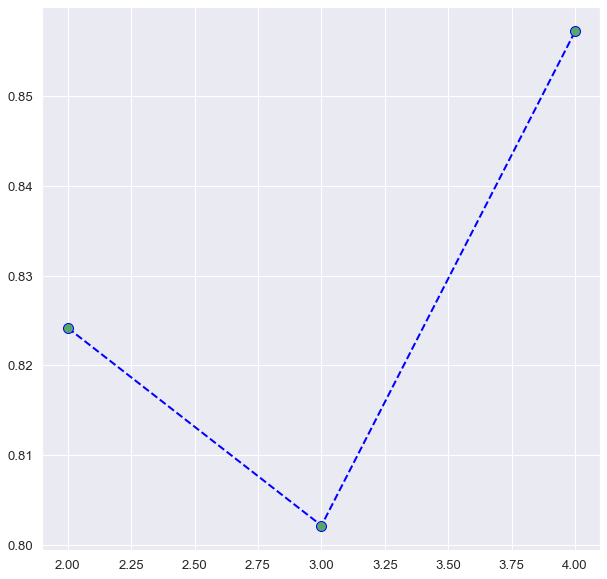

In [65]:
plt.plot(range(2, 5), scores, color='blue', marker='o', lw=2, ls='--', markerfacecolor='g', markersize=10)

Retrain with the best K

In [66]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=np.argmax(scores) + 1)

In [67]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8021978021978022

# if the result is 1 the patient has Heart Disease , if the result is 0 the patient has NO Heart Disease 

Now we can predict the patient is has Heart Disease or no

In [71]:
model.predict([[50,0,0,170,150,1,0,140,1,1.5,1,3,1]])

array([1], dtype=int64)

here the  patient has Heart Disease